In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data.csv")
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.shape

(4600, 18)

In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
print(data.nunique())

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64


In [8]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_score(x,y):
    x = x.copy()
    for colname in x.select_dtypes(['object','category']):
        x[colname], _ = x[colname].factorize()
        
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in x.dtypes]
    mi_score = mutual_info_regression(x,y,discrete_features=discrete_features,random_state=0)
    mi_score = pd.Series(mi_score,name='Mutual Information Score',index=x.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [9]:
x = data.copy()
y = x.pop('price')

mi_score = make_mi_score(x,y)
mi_score

street           1.149118
statezip         0.457778
city             0.310472
sqft_living      0.298258
sqft_above       0.200071
bathrooms        0.193590
sqft_lot         0.144439
bedrooms         0.076253
yr_built         0.075571
floors           0.071026
view             0.052216
sqft_basement    0.044597
yr_renovated     0.018178
condition        0.006858
waterfront       0.005099
date             0.004385
country          0.000000
Name: Mutual Information Score, dtype: float64

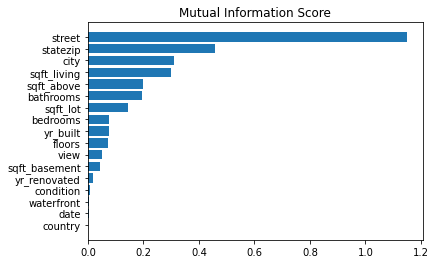

In [10]:
def plot_mi_score(score):
    score = score.sort_values(ascending=True)
    width = np.arange(len(score))
    ticks = list(score.index)
    plt.barh(width,score)
    plt.yticks(width,ticks)
    plt.title('Mutual Information Score')
    
    
plot_mi_score(mi_score)

In [11]:
new_data = data[['street','statezip','city','sqft_living','sqft_above','bathrooms','sqft_lot','bedrooms']]

In [12]:
new_data.head(10)

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot,bedrooms
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,7912,3.0
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,9050,5.0
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,11947,3.0
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,8030,3.0
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,10500,4.0
5,522 NE 88th St,WA 98115,Seattle,880,880,1.00,6380,2.0
6,2616 174th Ave NE,WA 98052,Redmond,1350,1350,2.00,2560,2.0
7,23762 SE 253rd Pl,WA 98038,Maple Valley,2710,2710,2.50,35868,4.0
8,46611-46625 SE 129th St,WA 98045,North Bend,2430,1570,2.50,88426,3.0
9,6811 55th Ave NE,WA 98115,Seattle,1520,1520,2.00,6200,4.0


In [13]:
from scipy import stats

z = np.abs(stats.zscore(new_data[['sqft_living','sqft_above','bathrooms','sqft_lot','bedrooms']]))
print(z)

[[0.82997105 0.56522378 0.84320364 0.19343402 0.44112227]
 [1.56852826 1.78955903 0.43280154 0.16171766 1.75970468]
 [0.21736733 0.11917123 0.20520105 0.0809775  0.44112227]
 ...
 [0.90400897 1.37196208 0.43280154 0.21846151 0.44112227]
 [0.05123751 0.87842149 0.20520105 0.2291637  0.6592912 ]
 [0.67422434 0.39122505 0.43280154 0.18813867 0.44112227]]


In [14]:
threshold = 3
print(np.where(z>3))

(array([  56,  107,  122,  122,  122,  122,  122,  217,  227,  233,  240,
        241,  252,  252,  252,  254,  272,  291,  291,  375,  418,  418,
        452,  461,  462,  462,  462,  462,  471,  479,  484,  495,  548,
        575,  581,  581,  634,  634,  634,  675,  679,  743,  747,  779,
        798,  839,  847,  878,  879,  999, 1017, 1031, 1078, 1089, 1103,
       1128, 1130, 1132, 1132, 1182, 1182, 1209, 1209, 1209, 1261, 1265,
       1272, 1275, 1275, 1301, 1302, 1302, 1360, 1390, 1406, 1408, 1411,
       1417, 1417, 1424, 1455, 1479, 1500, 1539, 1567, 1567, 1571, 1602,
       1637, 1644, 1722, 1762, 1786, 1944, 1952, 1952, 1962, 1962, 2005,
       2005, 2152, 2155, 2157, 2199, 2226, 2279, 2286, 2286, 2300, 2316,
       2328, 2328, 2328, 2365, 2401, 2480, 2551, 2588, 2654, 2654, 2654,
       2717, 2725, 2731, 2731, 2731, 2731, 2761, 2761, 2846, 2846, 2855,
       2872, 2889, 2917, 2967, 2967, 2967, 2968, 2980, 2980, 3004, 3004,
       3004, 3004, 3046, 3056, 3099, 3117, 3122, 3

In [15]:
new_dataset = new_data[(z<3).all(axis=1)]

In [16]:
new_dataset.shape

(4435, 8)

In [17]:
new_dataset = new_dataset.join(data['price'])

In [18]:
new_dataset.head(10)

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot,bedrooms,price
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,7912,3.0,313000.0
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,9050,5.0,2384000.0
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,11947,3.0,342000.0
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,8030,3.0,420000.0
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,10500,4.0,550000.0
5,522 NE 88th St,WA 98115,Seattle,880,880,1.00,6380,2.0,490000.0
6,2616 174th Ave NE,WA 98052,Redmond,1350,1350,2.00,2560,2.0,335000.0
7,23762 SE 253rd Pl,WA 98038,Maple Valley,2710,2710,2.50,35868,4.0,482000.0
8,46611-46625 SE 129th St,WA 98045,North Bend,2430,1570,2.50,88426,3.0,452500.0
9,6811 55th Ave NE,WA 98115,Seattle,1520,1520,2.00,6200,4.0,640000.0


In [19]:
from category_encoders import MEstimateEncoder

In [20]:
x = new_dataset.copy()
y = x.pop('price')

In [21]:
encoder = MEstimateEncoder(cols=['street','statezip','city'],m=0.5)
encoder.fit(x,y)
x_transform = encoder.transform(x)

In [22]:
x_transform.head(10)

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot,bedrooms
0,3.859344e+05,375656.132823,421503.366508,1340,1340,1.50,7912,3.0
1,1.766601e+06,849969.156900,570200.891592,3650,3370,2.50,9050,5.0
2,4.052677e+05,321296.502254,439062.351650,1930,1930,2.00,11947,3.0
3,4.572677e+05,605283.972110,794664.954324,2000,1000,2.25,8030,3.0
4,5.439344e+05,637165.488812,641698.401317,1940,1140,2.50,10500,4.0
5,5.039344e+05,594844.003652,570200.891592,880,880,1.00,6380,2.0
6,4.006011e+05,637165.488812,641698.401317,1350,1350,2.00,2560,2.0
7,4.986011e+05,335575.844532,335575.844532,2710,2710,2.50,35868,4.0
8,4.789344e+05,401852.651947,401852.651947,2430,1570,2.50,88426,3.0
9,6.039344e+05,594844.003652,570200.891592,1520,1520,2.00,6200,4.0


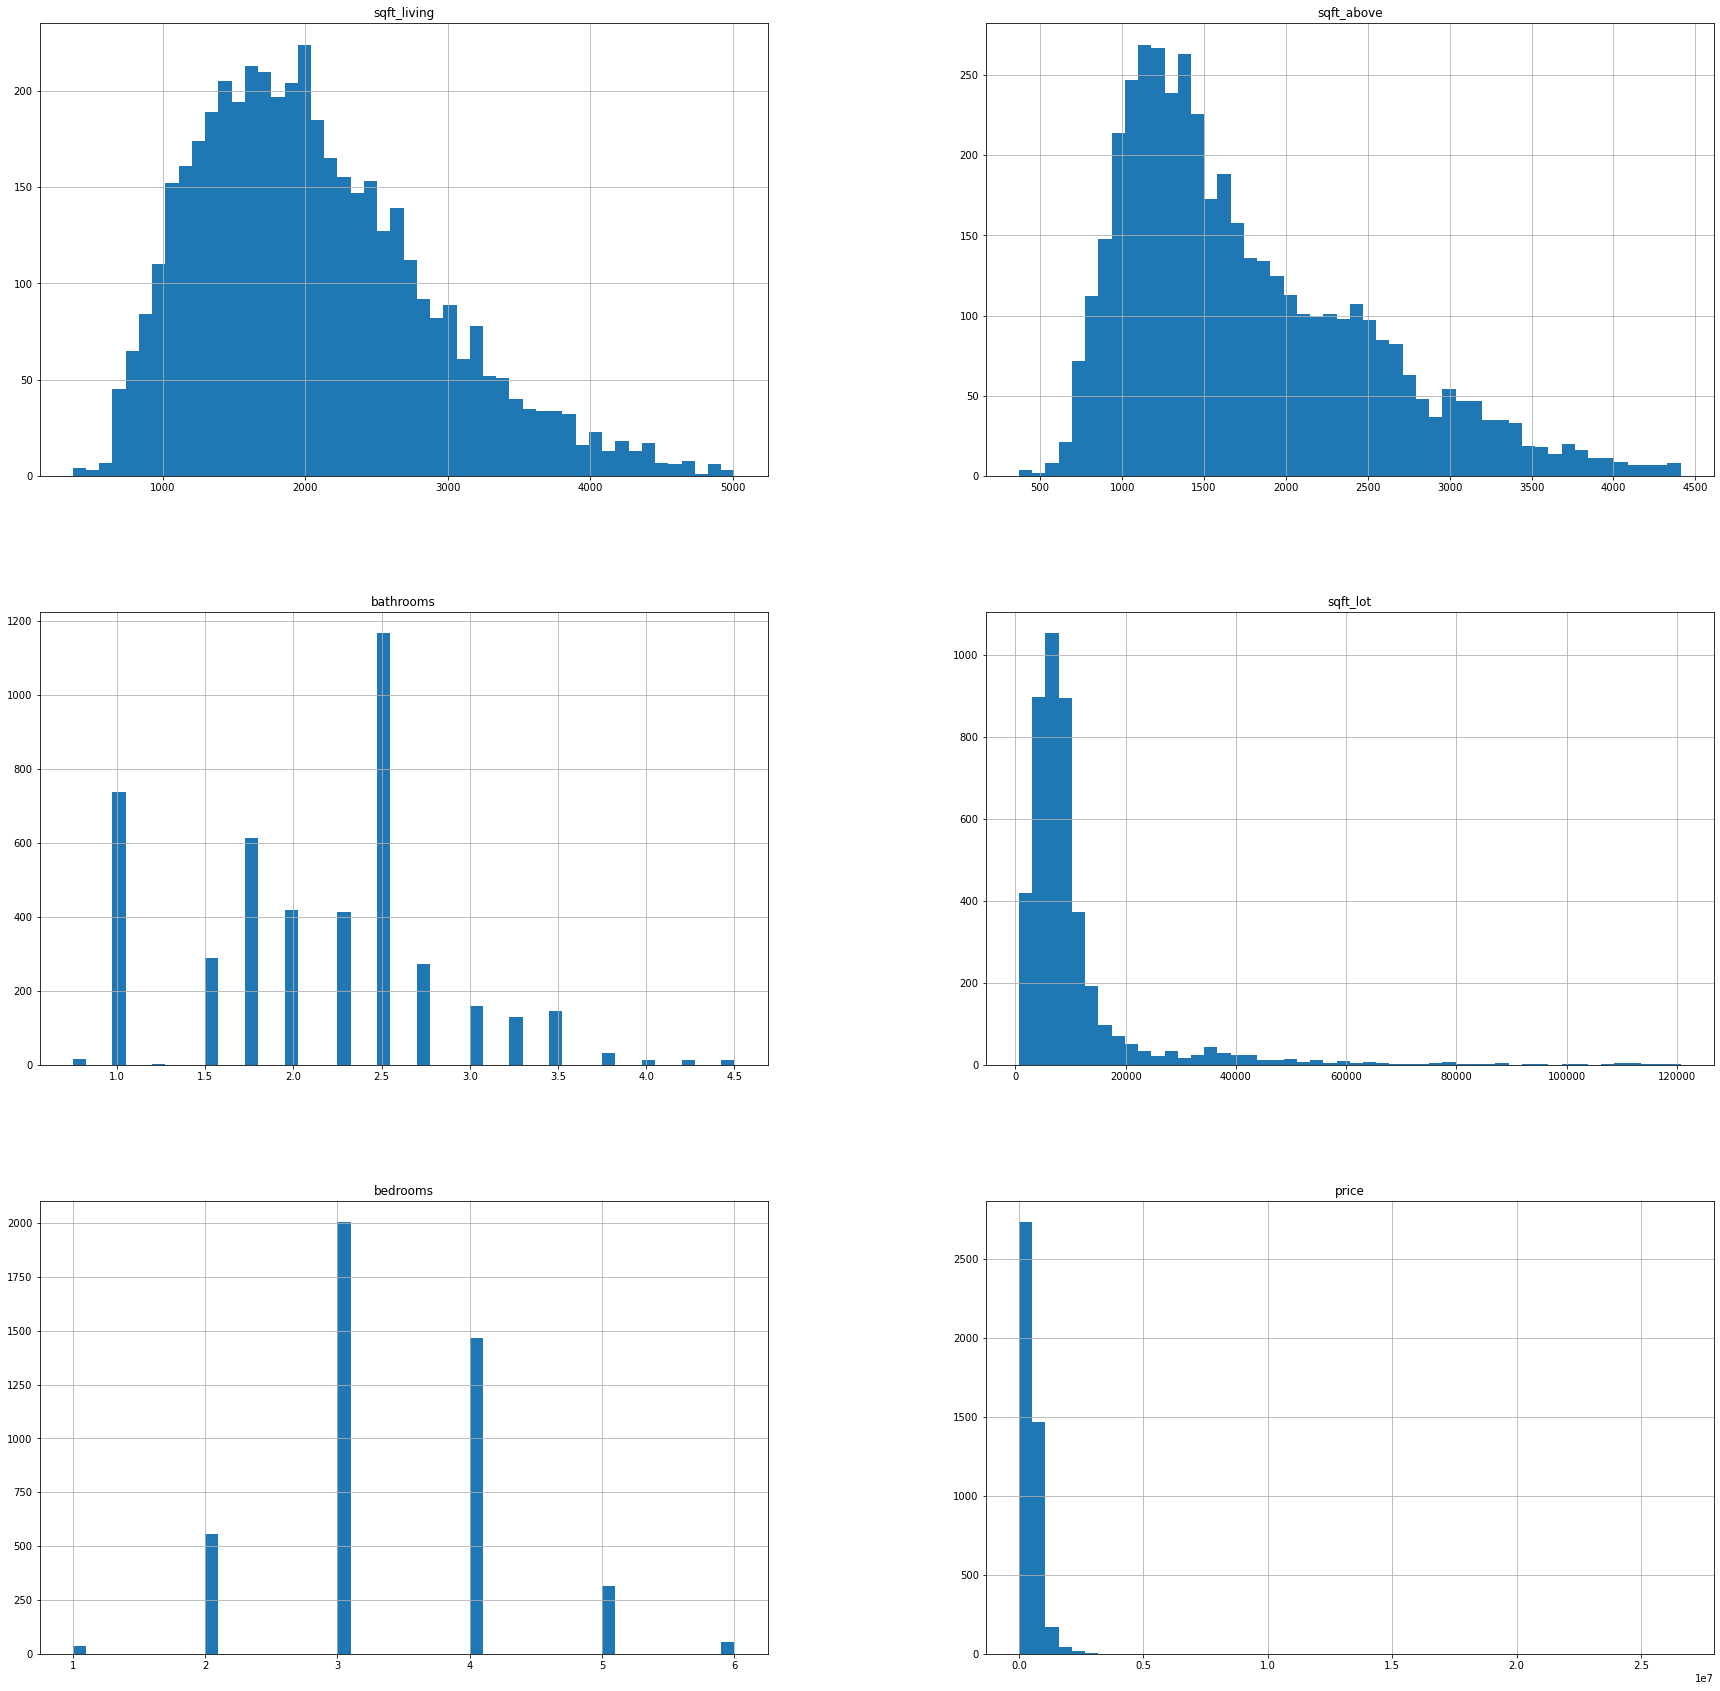

In [23]:
new_dataset.hist(bins=50, figsize=(30, 30))
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
y = new_dataset['price']
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4435, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_transform, y, test_size=0.2, random_state=42)

In [27]:
X_train

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot,bedrooms
2435,377267.746284,331504.701493,570200.891592,1470,1180,3.25,1235,3.0
3245,632934.412951,849969.156900,570200.891592,1820,1640,1.50,5756,3.0
3477,590601.079617,553363.283835,570308.876175,2460,2460,2.00,41343,3.0
52,713934.412951,594844.003652,570200.891592,2710,1880,2.00,4500,3.0
415,363934.412951,259764.938277,280095.812592,2190,1180,2.00,14439,4.0
...,...,...,...,...,...,...,...,...
4591,441378.857395,423885.453368,570200.891592,1880,940,1.75,5752,3.0
486,677267.746284,770533.574336,794664.954324,2980,2890,2.50,4930,4.0
3203,403267.746284,298978.470468,570200.891592,2470,1970,2.00,5080,4.0
3907,337267.746284,315003.128450,345278.884467,1570,1570,1.75,8750,3.0


In [28]:
y_train

2435    300000.000000
3245    683500.000000
3477    620000.000000
52      805000.000000
415     280000.000000
            ...      
4591    396166.666667
486     750000.000000
3203    339000.000000
3907    240000.000000
895     602000.000000
Name: price, Length: 3548, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import r2_score

In [34]:
score = r2_score(y_test, y_pred)

In [35]:
print(f'R2 Score: {score}')

R2 Score: 0.9995139626094579
